In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport

import dataframe_image as dfi

In [3]:
cd Egzamin-20220125

C:\Users\pproch\pythonKurs\Egzamin-20220125


In [4]:
df = pd.read_csv('mobile-price-classification_train.csv')

In [5]:
def meanCut(x):
    q05 = np.percentile(x, 5)
    q95 = x.quantile(0.95)
    return round(x[x.between(q05, q95)].mean(),0)

In [6]:
df["feat_sum"] = df["blue"] + df["dual_sim"]+df["four_g"]+df["three_g"]+df["touch_screen"]+df["wifi"]

In [7]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [8]:
#profile.to_notebook_iframe()

In [9]:
import io
buf = io.StringIO()
df.info(buf=buf)
s = buf.getvalue()
lines = [line.split() for line in s.splitlines()[3:-2]]
df_info = pd.DataFrame(lines)
df_info = df_info.rename(columns={0: 'No',1: 'Column',2: 'Non-Null',3: 'Count',4: 'Dtype' })
df_info = df_info.drop([0,1]).set_index('No')



In [10]:
df_price = df['price_range'].value_counts().to_frame()
df_price = df_price.rename(columns = {'price_range':'price_range_count'})

In [11]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'feat_sum'],
      dtype='object')

In [12]:
df_corr = df[['battery_power', 'clock_speed', 'fc','int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']]
corr = df_corr.corr(method='pearson')
mask = np.array(corr)
mask2 = mask[np.tril_indices_from(mask)] = 0 
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, 
           mask = mask,
           vmax= .5,
           annot = True, 
            cmap='rocket', 
            fmt = '.2f')
plt.savefig('heatmap.png')

In [13]:
fig, axs = plt.subplots(4,2, figsize = (25,20))
#fig.suptitle('Visualization of relevant continuous features, by price_range', fontsize = 24)
sns.set(font_scale = 1.5)
sns.boxplot(ax = axs[0,0], data = df, x = 'price_range', y = 'ram')

sns.kdeplot(ax = axs[0,1], data=df[df["price_range"]==0]['ram'], label="price_range_0", shade=True)
sns.kdeplot(ax = axs[0,1], data=df[df["price_range"]==1]['ram'], label="price_range_1", shade=True)
sns.kdeplot(ax = axs[0,1], data=df[df["price_range"]==2]['ram'], label="price_range_2", shade=True)
sns.kdeplot(ax = axs[0,1], data=df[df["price_range"]==3]['ram'], label="price_range_3", shade=True)

sns.boxplot(ax = axs[1,0], data = df, x = 'price_range', y = 'battery_power')

sns.kdeplot(ax = axs[1,1], data=df[df["price_range"]==0]['battery_power'], label="price_range_0", shade=True)
sns.kdeplot(ax = axs[1,1], data=df[df["price_range"]==1]['battery_power'], label="price_range_1", shade=True)
sns.kdeplot(ax = axs[1,1], data=df[df["price_range"]==2]['battery_power'], label="price_range_2", shade=True)
sns.kdeplot(ax = axs[1,1], data=df[df["price_range"]==3]['battery_power'], label="price_range_3", shade=True)

sns.boxplot(ax = axs[2,0], data = df, x = 'price_range', y = 'px_height')

sns.kdeplot(ax = axs[2,1], data=df[df["price_range"]==0]['px_height'], label="price_range_0", shade=True)
sns.kdeplot(ax = axs[2,1], data=df[df["price_range"]==1]['px_height'], label="price_range_1", shade=True)
sns.kdeplot(ax = axs[2,1], data=df[df["price_range"]==2]['px_height'], label="price_range_2", shade=True)
sns.kdeplot(ax = axs[2,1], data=df[df["price_range"]==3]['px_height'], label="price_range_3", shade=True)

sns.boxplot(ax = axs[3,0], data = df, x = 'price_range', y = 'px_width')

sns.kdeplot(ax = axs[3,1], data=df[df["price_range"]==0]['px_width'], label="price_range_0", shade=True)
sns.kdeplot(ax = axs[3,1], data=df[df["price_range"]==1]['px_width'], label="price_range_1", shade=True)
sns.kdeplot(ax = axs[3,1], data=df[df["price_range"]==2]['px_width'], label="price_range_2", shade=True)
sns.kdeplot(ax = axs[3,1], data=df[df["price_range"]==3]['px_width'], label="price_range_3", shade=True)
plt.savefig('cont_features.png')

In [14]:
pd.options.display.float_format = '{:,.0f}'.format
df.groupby("price_range")['clock_speed','fc','m_dep', 'mobile_wt', 'pc','ram', 'sc_h', 'sc_w', 'talk_time'].describe()

clock_speed                                 fc       ... sc_w      \
                  count mean std min 25% 50% 75% max count mean  ...  75% max   
price_range                                                      ...            
0                   500    2   1   0   1   2   2   3   500    4  ...    8  18   
1                   500    1   1   0   1   2   2   3   500    4  ...    8  18   
2                   500    2   1   0   1   2   2   3   500    4  ...    8  17   
3                   500    2   1   0   1   2   2   3   500    4  ...   10  18   

            talk_time                               
                count mean std min 25% 50% 75% max  
price_range                                         
0                 500   11   5   2   6  10  15  20  
1                 500   11   6   2   7  12  16  20  
2                 500   11   5   2   6  11  16  20  
3                 500   11   5   2   7  11  16  20  

[4 rows x 72 columns]

In [29]:
feat_stat = df.groupby(['price_range']).agg({'ram':[meanCut, np.median,'min', 'max'],
                                 'battery_power':[meanCut, np.median],
                                 'px_height':[meanCut, np.median, 'max'],
                                 'px_width':[meanCut, np.median],
                                 'int_memory': [meanCut, np.median],
                                })

In [17]:
df_feat = df[["feat_sum","price_range"]].groupby(["feat_sum"])["price_range"].value_counts(sort=False).to_frame()
df_feat = df_feat.rename(columns = {'price_range':'price_range_sum'})
df_feat = df_feat.reset_index()


In [18]:

def feat_norm(feats):
    for feat in feats:
        
        df_feat = df[[feat,"price_range"]].groupby(["price_range"])[feat].value_counts(sort=False, normalize = True).to_frame()
        df_feat = df_feat.rename(columns = {feat:feat + '_norm'})
        df_feat = df_feat.reset_index()
        df_feat = df_feat.rename(columns = {feat:'No_Yes'})
        if  feat == feats[0]:
            df_feat_norm = df_feat
        else:
            df_feat_norm = pd.merge(df_feat_norm, df_feat, how="left",on =["price_range",'No_Yes']).fillna(-1)
    return df_feat_norm


In [23]:
feats = ["blue","dual_sim","four_g", "three_g", "touch_screen", "wifi"]

feats_perc = feat_norm(feats).round(decimals=3)
feats_perc['price_range'] = feats_perc['price_range'].astype(str, copy = False)
feats_perc['No_Yes'] = feats_perc['No_Yes'].astype(str, copy = False)
feats_perc = feats_perc.style.highlight_max(color = 'lightgreen', axis = 0)
feats_perc

,price_range,No_Yes,blue_norm,dual_sim_norm,four_g_norm,three_g_norm,touch_screen_norm,wifi_norm
0,0,0,0.514000,0.500000,0.482000,0.254000,0.476000,0.504000
1,0,1,0.486000,0.500000,0.518000,0.746000,0.524000,0.496000
2,1,0,0.510000,0.490000,0.476000,0.244000,0.478000,0.496000
3,1,1,0.490000,0.510000,0.524000,0.756000,0.522000,0.504000
4,2,0,0.514000,0.502000,0.506000,0.226000,0.530000,0.496000
5,2,1,0.486000,0.498000,0.494000,0.774000,0.470000,0.504000
6,3,0,0.482000,0.470000,0.450000,0.230000,0.504000,0.476000
7,3,1,0.518000,0.530000,0.550000,0.770000,0.496000,0.524000


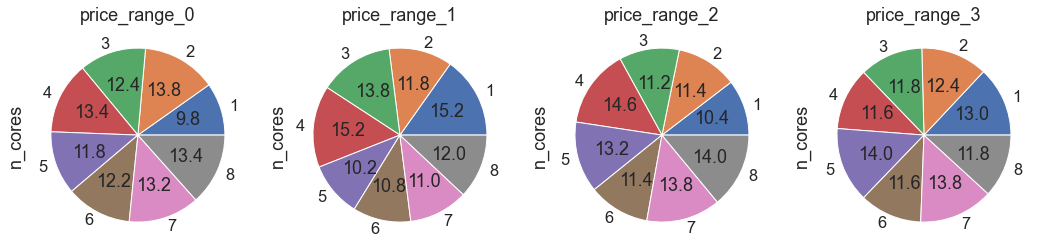

In [75]:

plt.figure(1,figsize=(18, 4))
plt.subplot(141).tick_params(bottom=False,labelbottom=False)
df[df['price_range']==0].n_cores.value_counts(normalize=True, sort = False).plot(kind='pie', autopct="%.1f", title = 'price_range_0', xlabel = '')
plt.subplot(142).tick_params(bottom=False,labelbottom=False)
df[df['price_range']==1].n_cores.value_counts(normalize=True, sort = False).plot(kind='pie', autopct="%.1f", title = 'price_range_1', xlabel = '')
plt.subplot(143).tick_params(bottom=False,labelbottom=False)
df[df['price_range']==2].n_cores.value_counts(normalize=True, sort = False).plot(kind='pie', autopct="%.1f", title = 'price_range_2', xlabel = '')
plt.subplot(144).tick_params(bottom=False,labelbottom=False)
df[df['price_range']==3].n_cores.value_counts(normalize=True, sort = False).plot(kind='pie', autopct="%.1f", title = 'price_range_3', xlabel = '')
plt.savefig('n_cores_features.png')

In [37]:
table = pd.pivot_table(df, index = ['price_range'], columns = ['touch_screen','blue','wifi','three_g','four_g', 'dual_sim'],
               values = ["ram"], aggfunc = 'count')

In [42]:
df2 = table.iloc[0].reset_index()
df3 = table.iloc[1].reset_index()
df4 = table.iloc[2].reset_index()
df5 = table.iloc[3].reset_index()


df2['price_range_1']= df3[1]
df2['price_range_1']=[number*100/sum(df2['price_range_1']) for number in df2['price_range_1']]
df2['price_range_2']= df4[2]
df2['price_range_2']=[number*100/sum(df2['price_range_2']) for number in df2['price_range_2']]
df2['price_range_3']= df5[3]
df2['price_range_3']=[number*100/sum(df2['price_range_3']) for number in df2['price_range_3']]

del df2['level_0']
pd.options.display.float_format = '{:,.2f}'.format
df2_new = df2.rename(columns = {0:'price_range_0'})
df2_new['price_range_0']=[number*100/sum(df2_new['price_range_0']) for number in df2_new['price_range_0']]
df2_new['feat_sum'] = df2_new["blue"] + df2_new["dual_sim"]+df2_new["four_g"]+df2_new["three_g"]+df2_new["touch_screen"]+df2_new["wifi"]
df2_new[df2_new['feat_sum'] > 2.0].sort_values('feat_sum')
#sum()

,touch_screen,blue,wifi,three_g,four_g,dual_sim,price_range_0,price_range_1,price_range_2,price_range_3,feat_sum
5,0,0,0,1,1,1,4.40,2.40,3.20,3.20,3
42,1,1,1,0,0,0,1.40,1.60,1.20,1.40,3
38,1,1,0,1,0,0,1.40,1.20,1.20,1.40,3
37,1,1,0,0,0,1,2.00,2.40,2.20,1.60,3
32,1,0,1,1,0,0,2.40,2.00,2.40,1.60,3
28,1,0,0,1,1,0,4.40,3.60,3.60,3.20,3
27,1,0,0,1,0,1,1.00,2.00,0.80,1.40,3
20,0,1,1,1,0,0,1.20,0.80,1.60,1.20,3
31,1,0,1,0,0,1,1.80,1.00,1.60,1.20,3
9,0,0,1,1,0,1,2.00,1.60,2.40,2.00,3


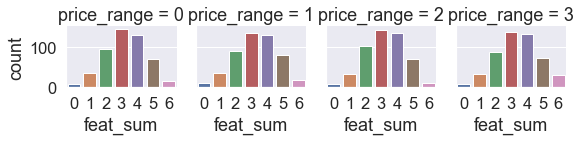

In [78]:
g = sns.catplot(x='feat_sum', col="price_range", col_wrap=4, data=df, kind="count", height=2, aspect=1)
plt.savefig('sum_feat_count.png')

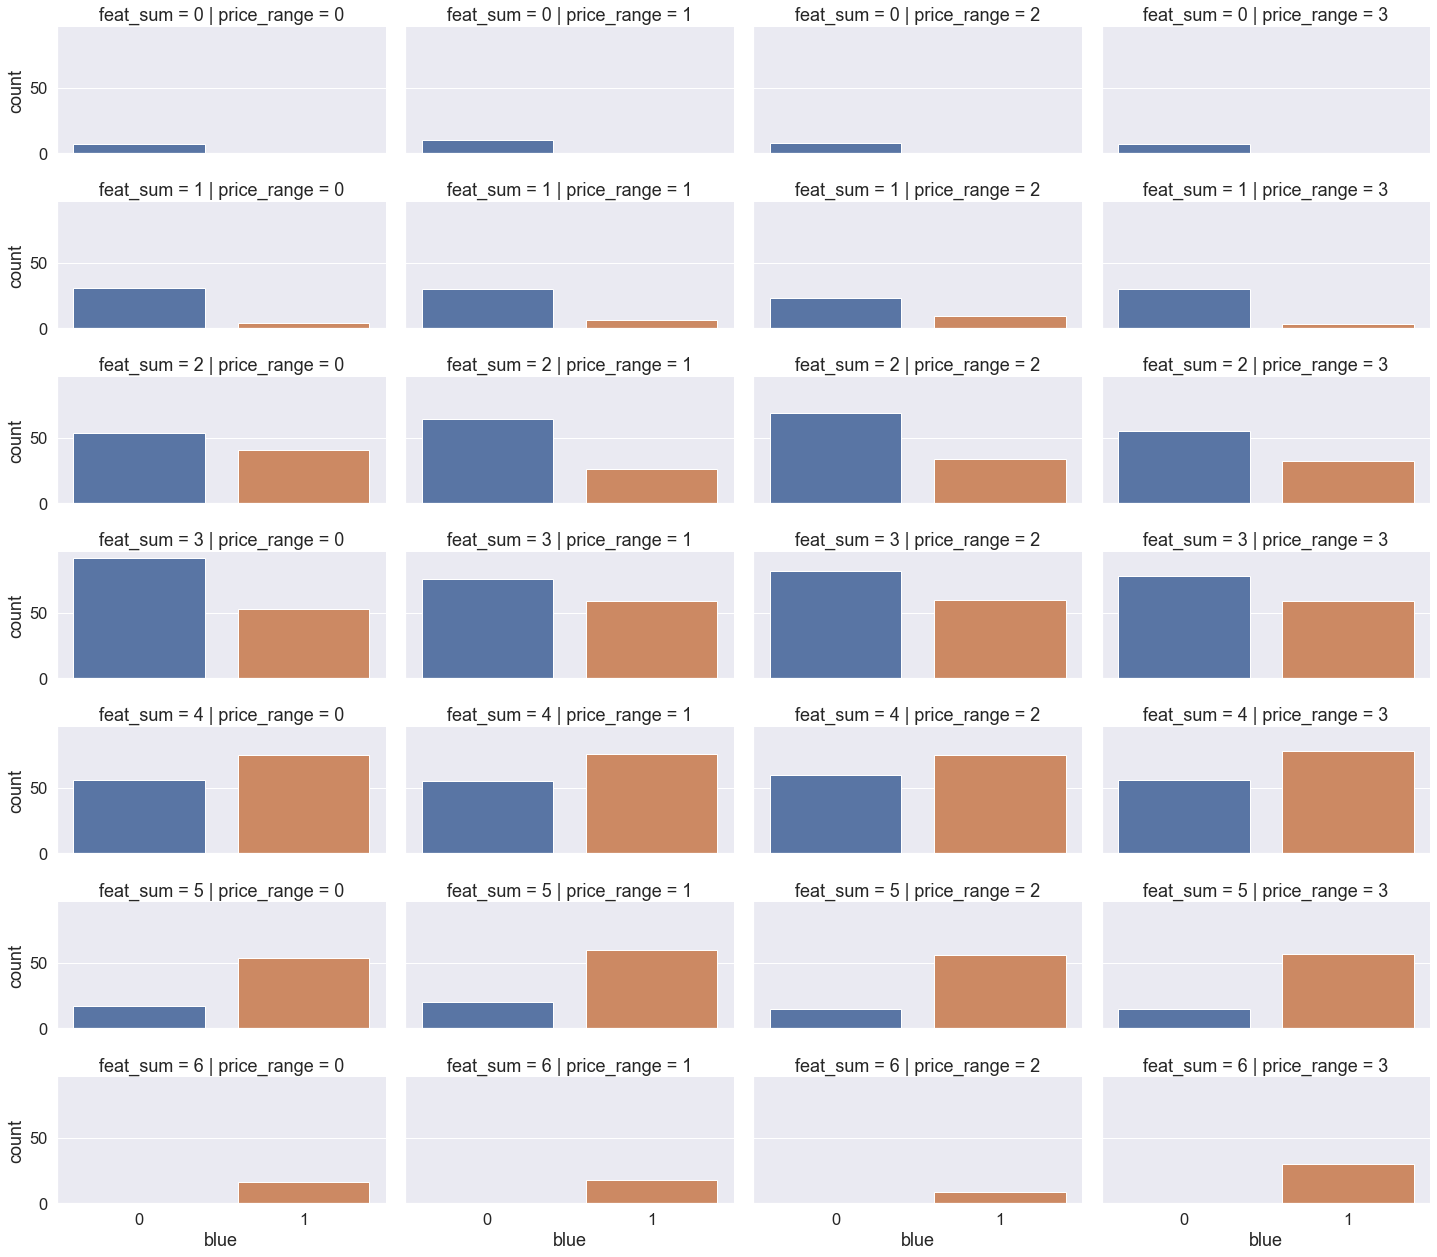

In [50]:
g = sns.catplot(x='blue',row ='feat_sum', col="price_range", data=df, kind="count", height=2.5, aspect=2)
plt.savefig('sum_feat_blue.png')

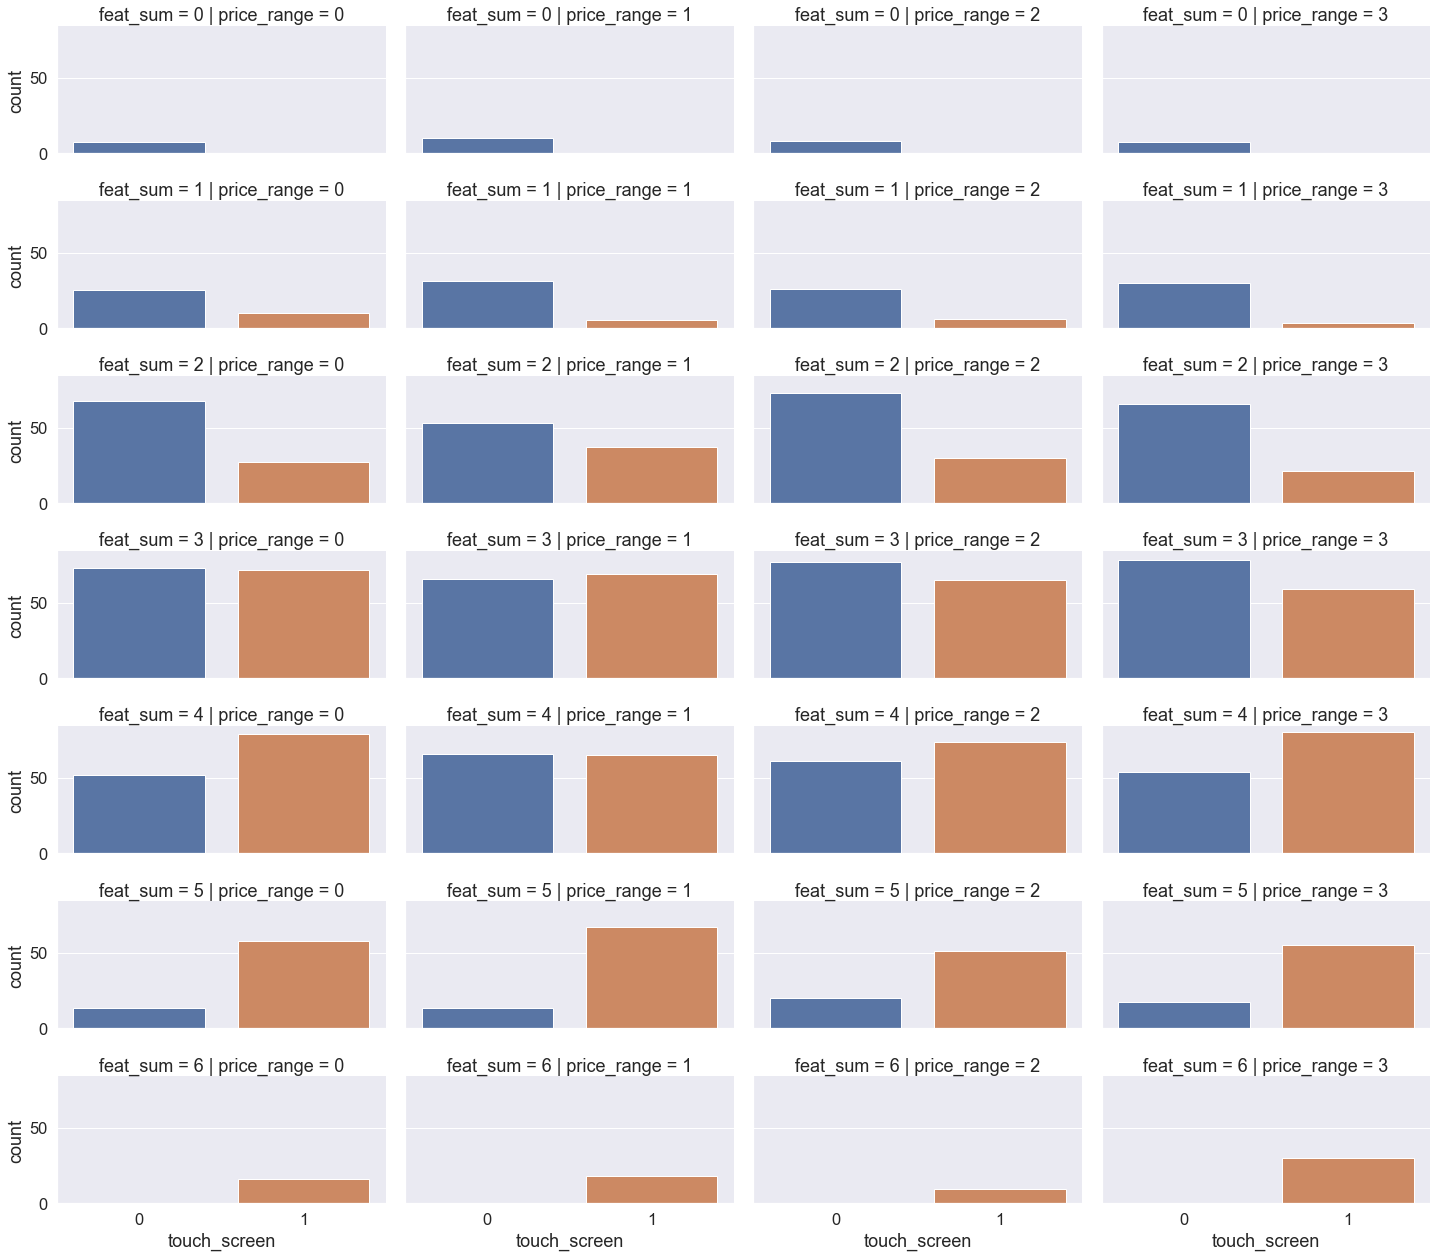

In [51]:
g = sns.catplot(x='touch_screen',row ='feat_sum', col="price_range", data=df, kind="count", height=2.5, aspect=2)
plt.savefig('sum_feat_ts.png')

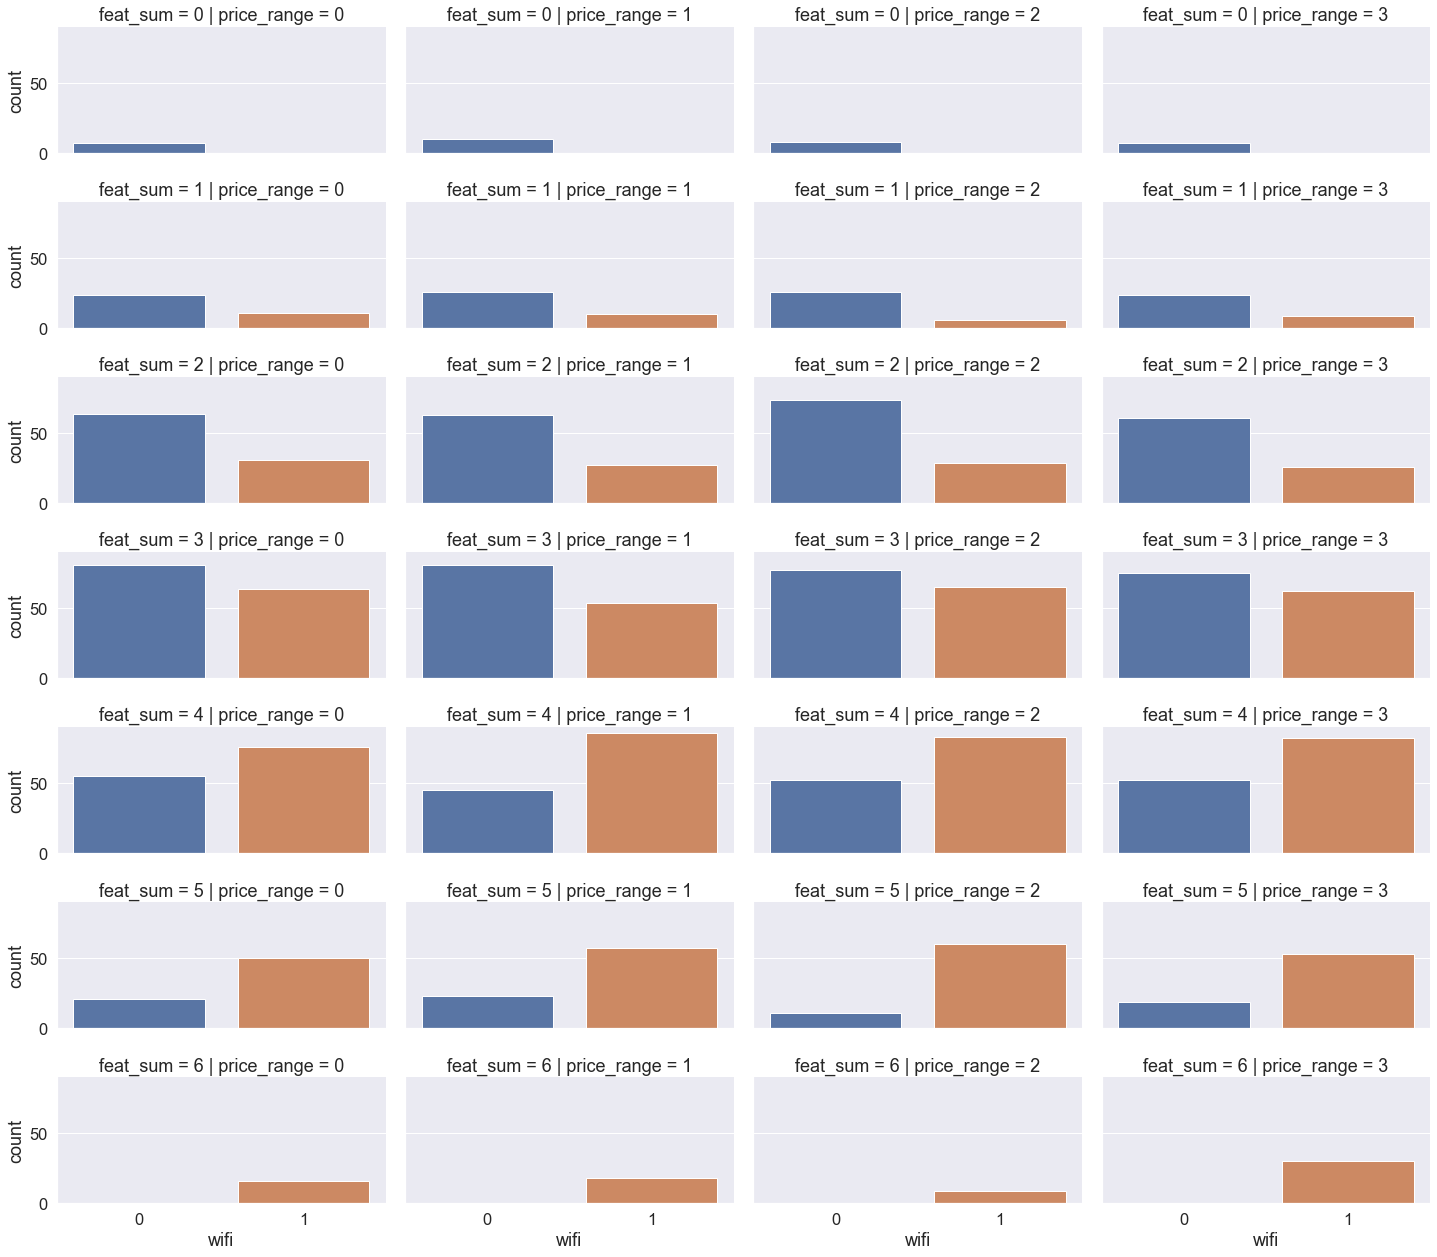

In [52]:
g = sns.catplot(x='wifi',row ='feat_sum', col="price_range", data=df, kind="count", height=2.5, aspect=2)
plt.savefig('sum_feat_wf.png')

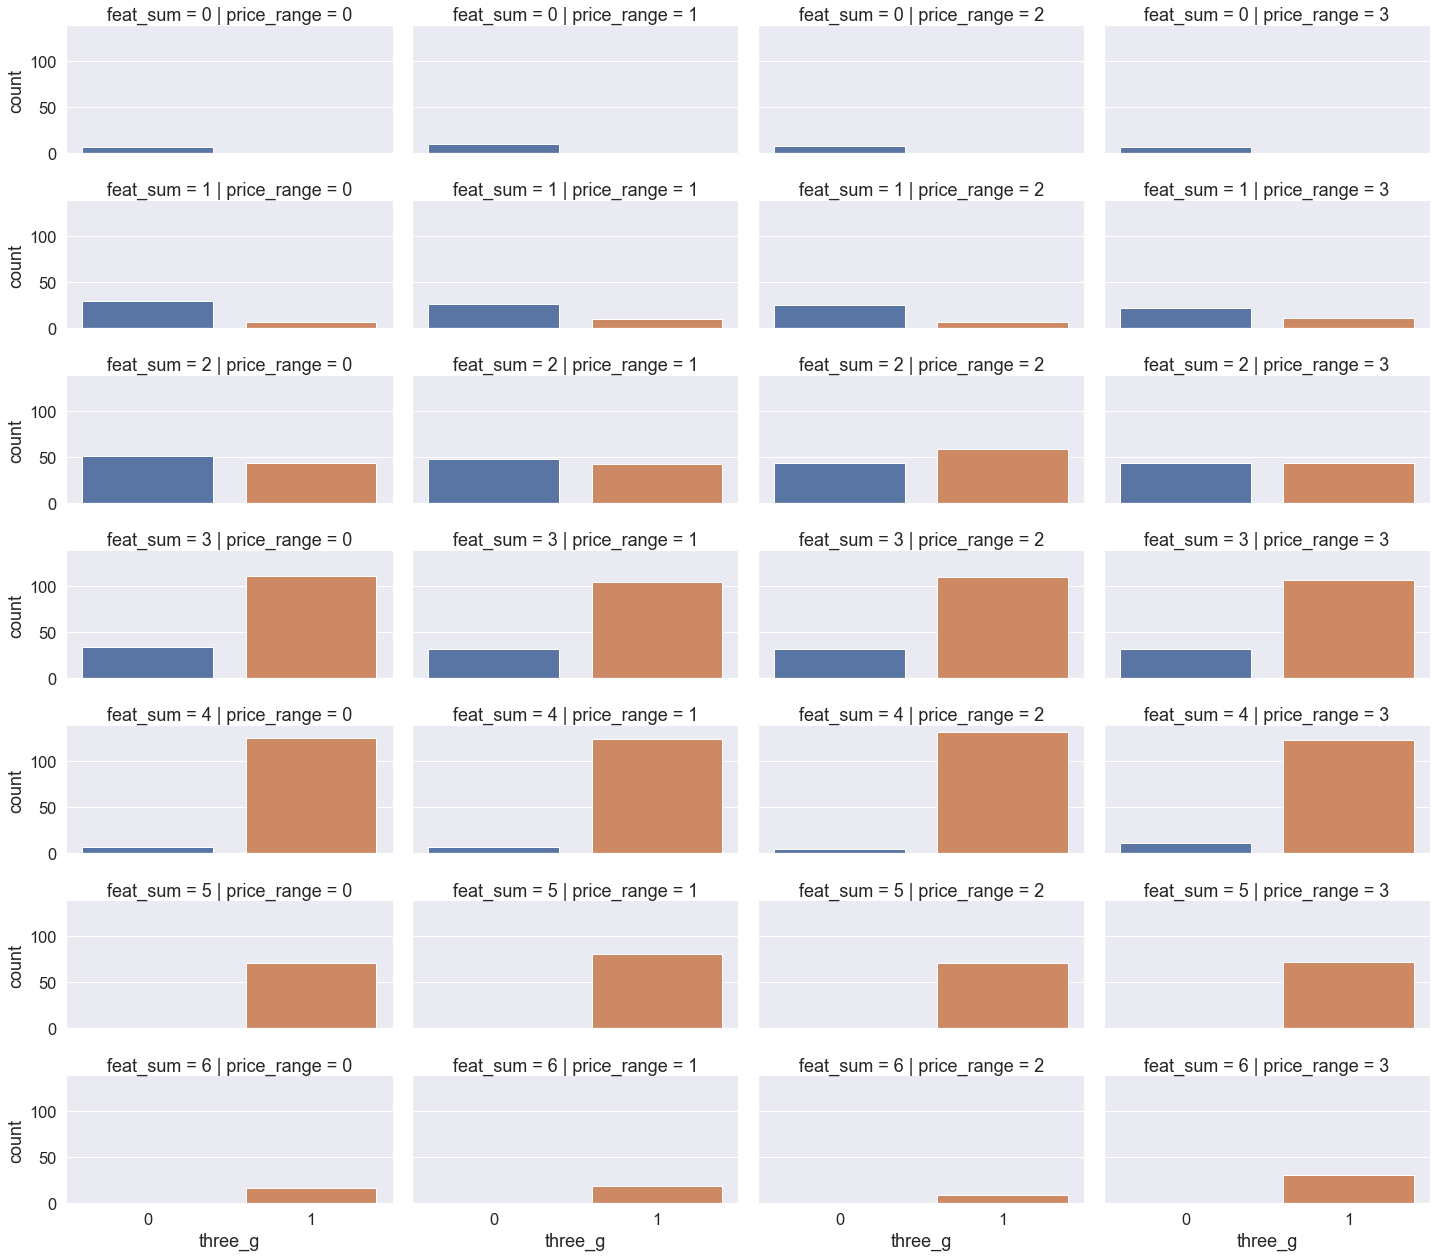

In [53]:
g = sns.catplot(x='three_g',row ='feat_sum', col="price_range", data=df, kind="count", height=2.5, aspect=2)
plt.savefig('sum_feat_3g.png')

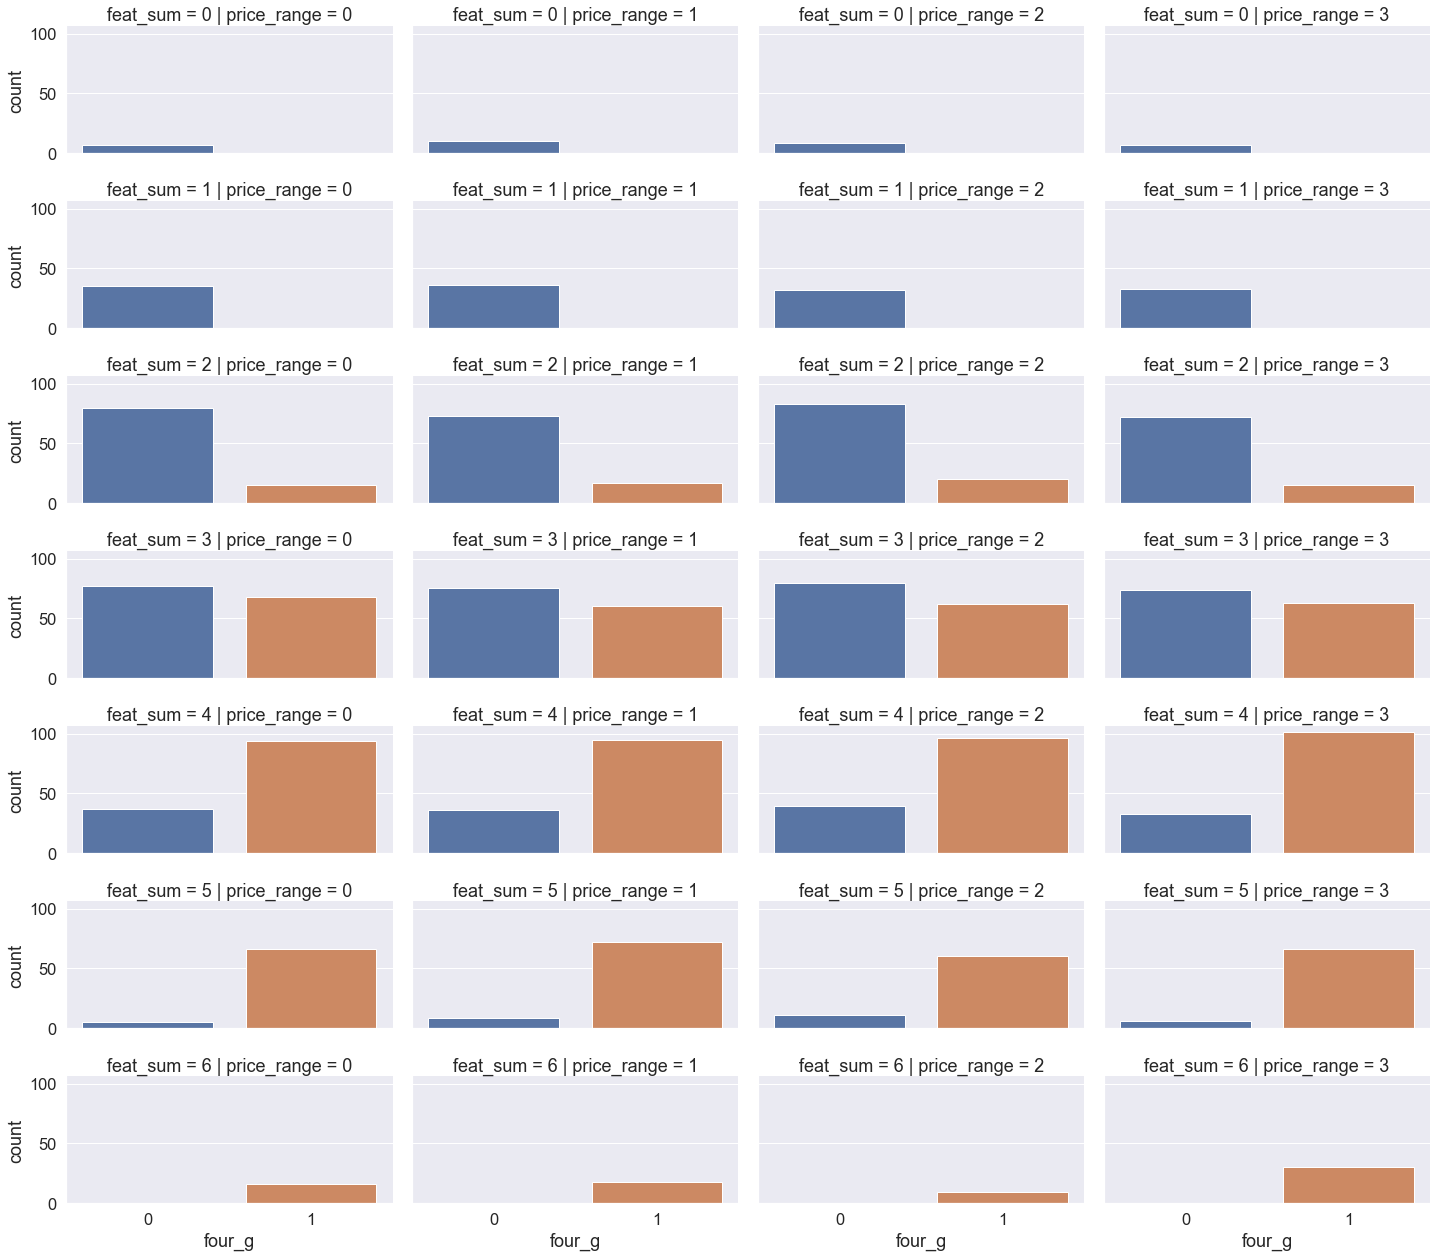

In [54]:
g = sns.catplot(x='four_g',row ='feat_sum', col="price_range", data=df, kind="count", height=2.5, aspect=2)
plt.savefig('sum_feat_4g.png')

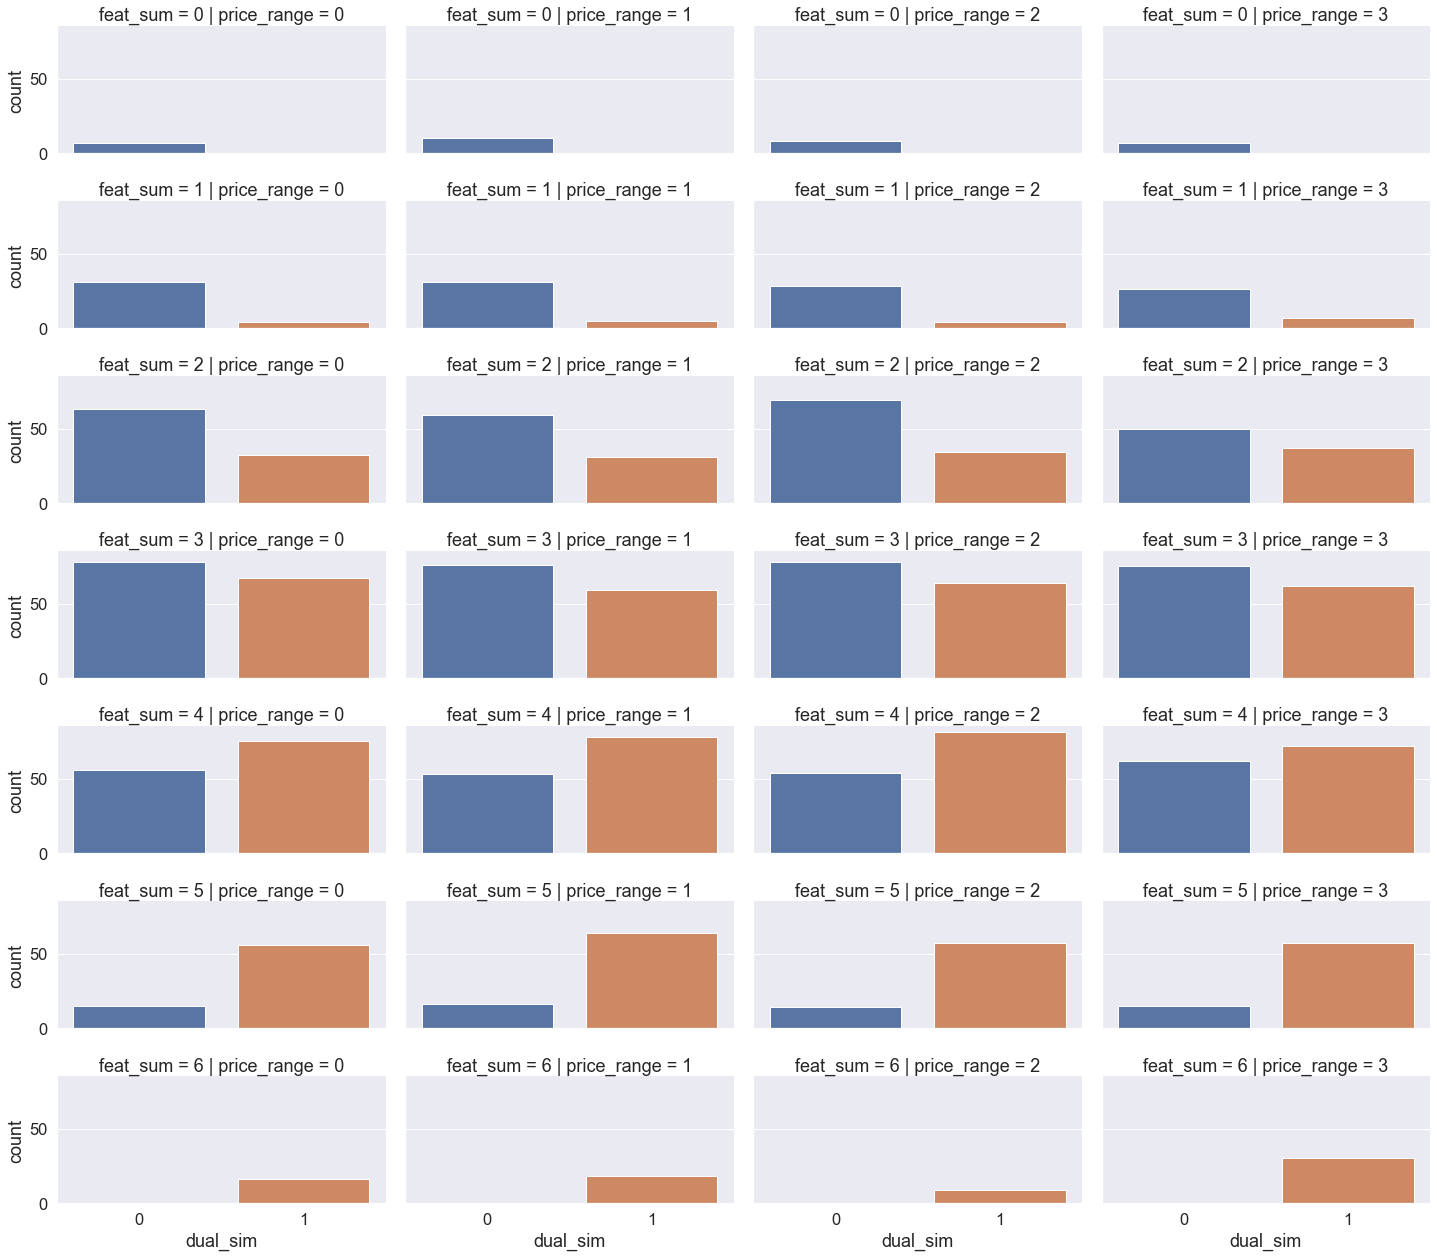

In [55]:
g = sns.catplot(x='dual_sim',row ='feat_sum', col="price_range", data=df, kind="count", height=2.5, aspect=2)
plt.savefig('sum_feat_2sim.png')

<AxesSubplot:title={'center':'price_range_3'}, xlabel='ram,tsc,blu,wfi,3g,4g,2sim'>

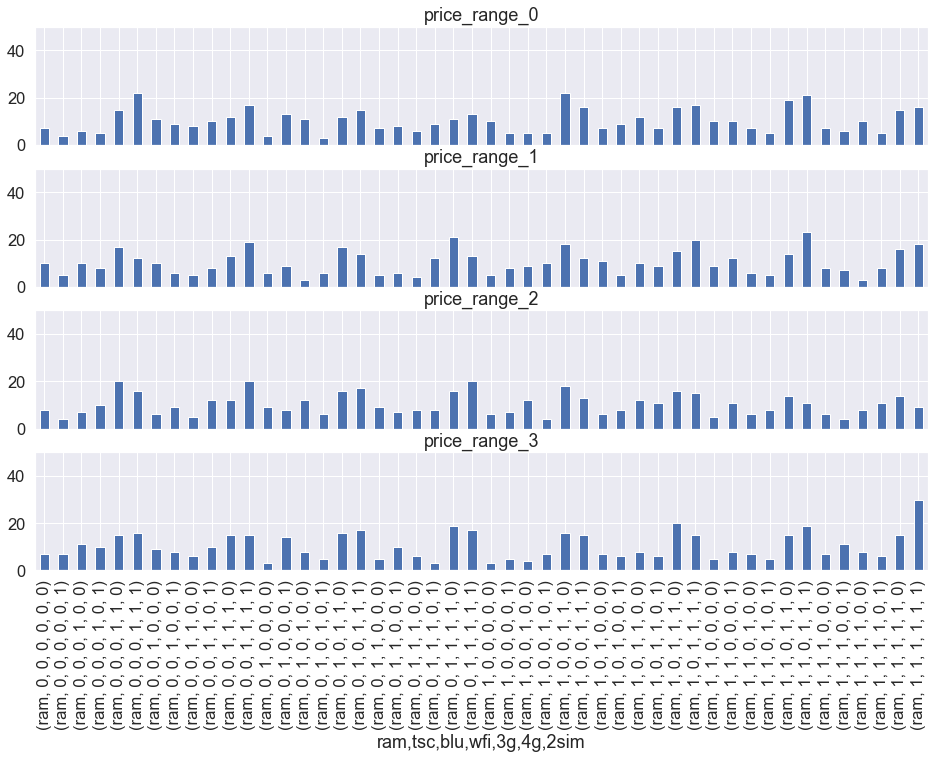

In [80]:
plt.figure(1)
plt.subplot(411).tick_params(bottom=False,labelbottom=False)             
table.iloc[0].plot(kind='bar',figsize=(16, 10),ylim = (0, 50), title = 'price_range_0', xlabel = '')
plt.subplot(412).tick_params(bottom=False,labelbottom=False)            
table.iloc[1].plot(kind='bar',figsize=(16, 10), ylim = (0, 50), title = 'price_range_1', xlabel = '')
plt.subplot(413).tick_params(bottom=False,labelbottom=False)             
table.iloc[2].plot(kind='bar',figsize=(16, 10),ylim = (0, 50),title = 'price_range_2', xlabel = '')
plt.subplot(414)            
table.iloc[3].plot(kind='bar',figsize=(16, 10),ylim = (0, 50),title = 'price_range_3', xlabel = 'ram,tsc,blu,wfi,3g,4g,2sim')

# Report in HTML

In [77]:
html = f'''
    <html>
        <body>
            <h1>Analiza danych i programowanie w Pythonie - Egzamin</h1>
            <h1>strategia róznicowania cen na rynku telefonów komórkowych - Raport</h1>
            <p>Raport przygotowany w ramach kurs: Analiza danych i programowanie w Pythonie.<br>
            Dane pozyskane z https://www.kaggle.com/iabhishekofficial/mobile-price-classification
            </p>
            <h2>Data</h2>
            {df_info.to_html()}<br><br>
            {df_price.to_html()}
            <h2>Heatmap for continuous variables</h2>
            <img src=heatmap.png width="700">
            <h2>Analysis of relevant continuous variables </h2>
            <img src=cont_features.png width="700"><br>
            {feat_stat.to_html()}<br><br>
            <h2>Analysis of categorical variables</h2>
            
            <img src=Cat_features_perc.png width="700"><br>
            <img src= sum_feat_count.png width=700, align = left"><br>
            
            <h3>Analysis of bluetooh variable</h3>
            <img src= sum_feat_blue.png width=700, align = left"><br>
            <h3>Analysis of touch screen variable</h3>
            <img src= sum_feat_ts.png width=700, align = left"><br>
            <h3>Analysis of wifi variable</h3>
            <img src= sum_feat_wf.png width=700, align = left"><br>
            <h3>Analysis of 3g variable</h3>
            <img src= sum_feat_3g.png width=700, align = left"><br>
            <h3>Analysis of 4g variable</h3>
            <img src= sum_feat_4g.png width=700, align = left"><br>
            <h3>Analysis of double sim variable</h3>
            <img src= sum_feat_2sim.png width=700, align = left"><br>
            <h3>Analysis of N_cores variable</h3>
            <img src= n_cores_features.png width=800">
            
        </body>
    </html>
    '''
# 3. Write the html string as an HTML file
with open('html_report.html', 'w') as f:
    f.write(html)